In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
import numpy as np
import pandas as pd


df = pd.read_csv('/kaggle/input/email-spam-classification-dataset-csv/emails.csv')


print(df.head())


  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]


In [8]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [9]:
feature_cols = list(range(1, 3001))  # Assuming columns 1 to 3000 are features

# Features
X = df.iloc[:, feature_cols]  # Select columns by index

# Target variable
y = df['Prediction']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [11]:

clf = DecisionTreeClassifier()


clf = clf.fit(X_train,y_train)


y_pred = clf.predict(X_test)

In [12]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9304123711340206


In [13]:
from sklearn import tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_13 <= 0.50
|   |--- feature_916 <= 0.50
|   |   |--- feature_92 <= 0.50
|   |   |   |--- feature_104 <= 0.50
|   |   |   |   |--- feature_418 <= 0.50
|   |   |   |   |   |--- feature_36 <= 0.50
|   |   |   |   |   |   |--- feature_81 <= 0.50
|   |   |   |   |   |   |   |--- feature_68 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_107 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_20 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 16
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 15
|   |   |   |   |   |   |   |   |   |--- feature_20 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_38 <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |   |--- feature_38 >  1.50
|   |   |   |   |   |   |   

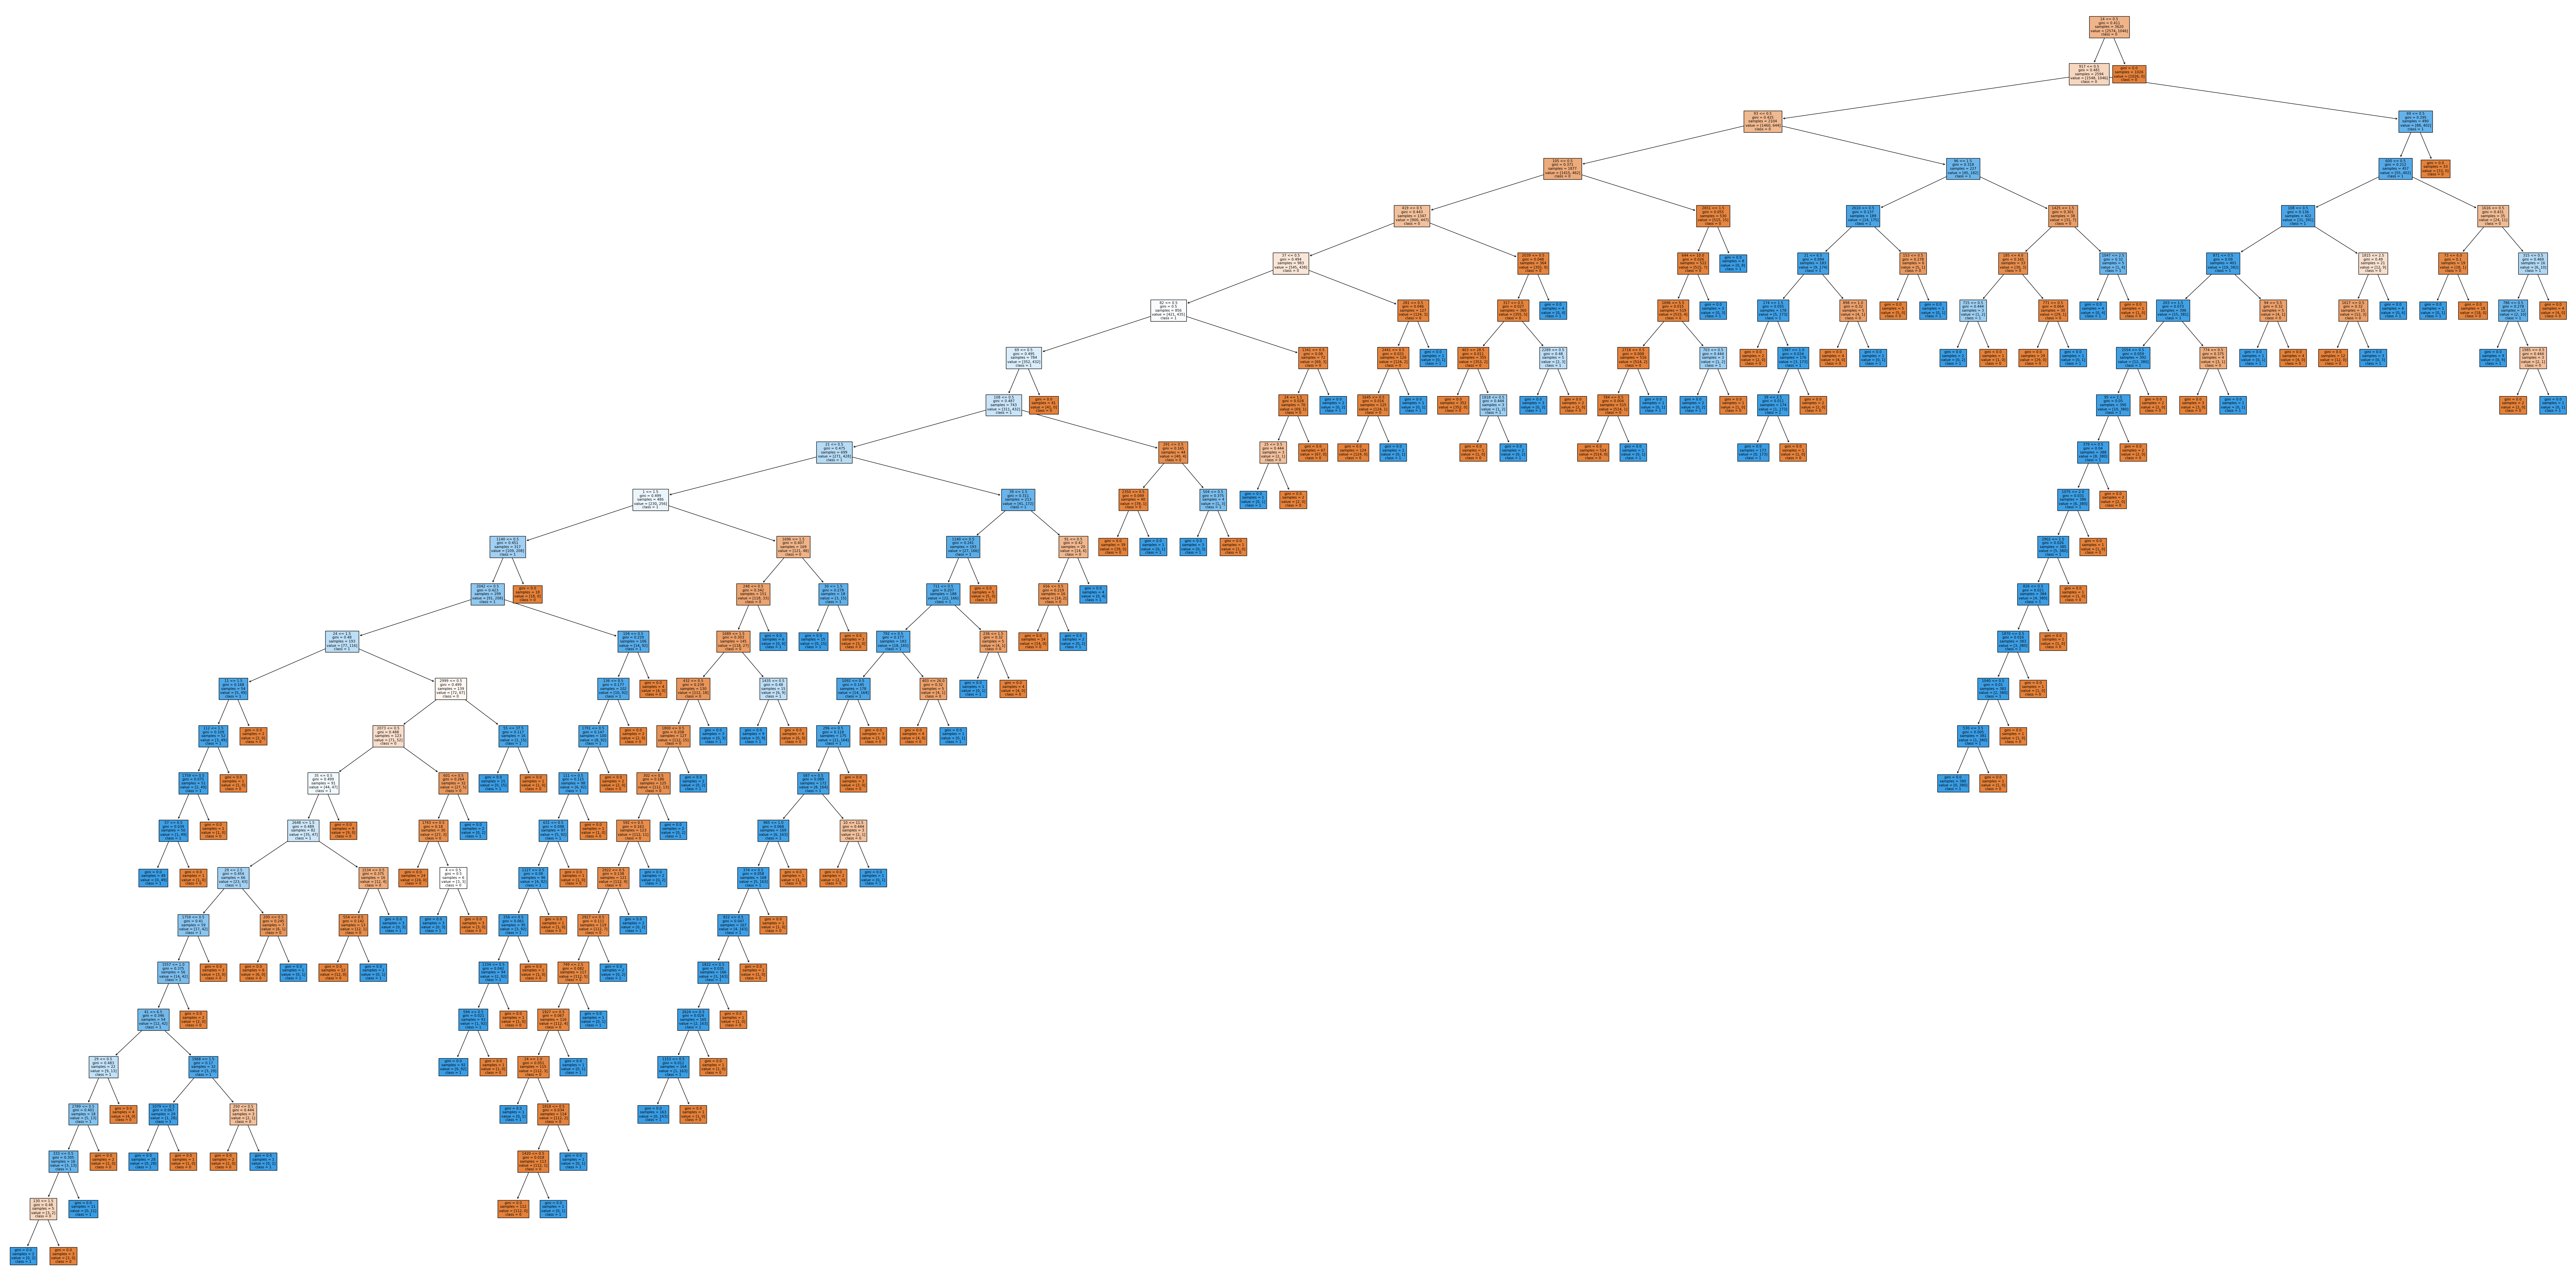

In [14]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(100,50))
_ = tree.plot_tree(clf, 
                   feature_names=feature_cols,
                   class_names=['0','1'],
                   filled=True)